# **Import Libraries & Define Constants**

In [327]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
from PIL import Image

In [328]:
k = 1.38 # Boltzman constant
J1 = 1 * k
J2 = 0 * k
J3 = 0 * k

In [329]:
N = 20
steps = 1000
temperatures = [2.25, 4, 7]

# **Functions**

In [331]:
def lattice(L):
    return np.random.choice(np.array([-1, 1]), size=(L, L))

In [332]:
lattice(100)

array([[-1,  1, -1, ...,  1,  1, -1],
       [ 1, -1,  1, ..., -1,  1, -1],
       [ 1,  1,  1, ...,  1,  1, -1],
       ...,
       [-1, -1,  1, ...,  1,  1,  1],
       [-1,  1, -1, ...,  1, -1, -1],
       [-1, -1,  1, ..., -1,  1, -1]])

In [333]:
def image_this(field):
    return Image.fromarray(np.uint8((field + 1) * 0.5 * 255))

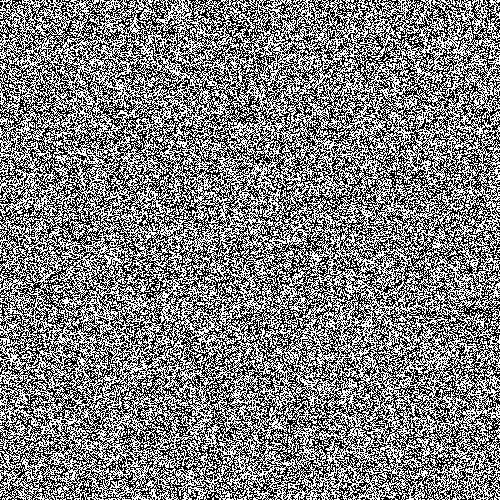

In [334]:
image_this(lattice(500))

In [335]:
def compute_energy(field):
    L = field.shape[0]
    total_energy = 0
    for i in range(L):
        for j in range(L):
            S = field[i, j]
            total_energy -= J1 * S * (
                field[i, (j+1)%L] + field[i, (j-1)%L] +
                field[(i+1)%L, j] + field[(i-1)%L, j]
            )
            total_energy -= J2 * S * (
                field[(i+1)%L, (j+1)%L] + field[(i-1)%L, (j-1)%L] +
                field[(i+1)%L, (j-1)%L] + field[(i-1)%L, (j+1)%L]
            )
            total_energy -= J3 * S * (
                field[(i+2)%L, j] + field[i, (j+2)%L] +
                field[(i-2)%L, j] + field[i, (j-2)%L]
            )
    return total_energy / (L**2)

In [336]:
def metropolis(field, T):
    L = field.shape[0]
    for _ in range(L**2):
        i, j = np.random.randint(0, L, size=2)
        S = field[i, j]
        dE = 2 * S * (
            J1 * (field[i, (j+1)%L] + field[i, (j-1)%L] +
                  field[(i+1)%L, j] + field[(i-1)%L, j]) +
            J2 * (field[(i+1)%L, (j+1)%L] + field[(i-1)%L, (j-1)%L] +
                  field[(i+1)%L, (j-1)%L] + field[(i-1)%L, (j+1)%L]) +
            J3 * (field[(i+2)%L, j] + field[i, (j+2)%L] +
                  field[(i-2)%L, j] + field[i, (j-2)%L])
        )
        if dE <= 0 or np.random.rand() < np.exp(-dE / T):
            field[i, j] *= -1

In [337]:
def simulate(N, T, steps):
    field = lattice(N)
    magnetization = []
    energy = []
    
    for step in range(steps+1):
        metropolis(field, T)
        mag = np.abs(np.sum(field)) / (N**2)
        en = compute_energy(field) / (N**2)
        magnetization.append(mag)
        energy.append(en)
    
    return np.array(energy), np.array(magnetization)

In [338]:
def heat_capacity(energies, T):
    return (np.std(energies)**2) / (k*(T**2))

# **Results**

In [340]:
results = {}
for T in temperatures:
    energies, magnetizations = simulate(N, T, steps)
    results[T] = {
        "energies": energies,
        "magnetizations": magnetizations,
        "heat_capacity": heat_capacity(energies, T)
    }

In [341]:
print(f"\t All energy & magnetization for {N}x{N} lattice\n")
for T in temperatures:
    all_e = results[T]['energies'].sum()
    all_mg = results[T]['magnetizations'].sum()
    print(f"The Energy in 'T={T}' is  {all_e}")
    print(f"The Magnetization in 'T={T}' is  {all_mg}\n")

	 All energy & magnetization for 20x20 lattice

The Energy in 'T=2.25' is  -12.703727999999966
The Magnetization in 'T=2.25' is  803.21

The Energy in 'T=4' is  -5.820356999999985
The Magnetization in 'T=4' is  136.70499999999998

The Energy in 'T=7' is  -2.919182999999996
The Magnetization in 'T=7' is  64.99000000000001



In [342]:
print(f"\t ensemble averaging energy & magnetization for {N}x{N} lattice\n")
for T in temperatures:
    ensemble_mean_e = results[T]['energies'].mean()
    ensemble_mean_mg = results[T]['magnetizations'].mean()
    print(f"The average of Energy in 'T={T}' is  {ensemble_mean_e}")
    print(f"The average of Magnetization in 'T={T}' is  {ensemble_mean_mg}\n")

	 ensemble averaging energy & magnetization for 20x20 lattice

The average of Energy in 'T=2.25' is  -0.012691036963036929
The average of Magnetization in 'T=2.25' is  0.8024075924075924

The average of Energy in 'T=4' is  -0.005814542457542443
The average of Magnetization in 'T=4' is  0.13656843156843154

The average of Energy in 'T=7' is  -0.0029162667332667293
The average of Magnetization in 'T=7' is  0.06492507492507493



In [343]:
print(f"\t time averaging energy & magnetization for {N}x{N} lattice\n")
for T in temperatures:
    a , b = [] , []
    for i in range(20):
        a.append(results[T]['energies'][i])
        b.append(results[T]['magnetizations'][i])
    time_mean_e = sum(a)/len(a)
    time_mean_mg = sum(b)/len(b)
    print(f"The average of Energy in first 20 second for 'T={T}' is  {time_mean_e}")
    print(f"The mean Magnetization in first 20 second for 'T={T}' is  {time_mean_mg}\n")

	 time averaging energy & magnetization for 20x20 lattice

The average of Energy in first 20 second for 'T=2.25' is  -0.009225299999999978
The mean Magnetization in first 20 second for 'T=2.25' is  0.18575

The average of Energy in first 20 second for 'T=4' is  -0.005533799999999986
The mean Magnetization in first 20 second for 'T=4' is  0.18375000000000002

The average of Energy in first 20 second for 'T=7' is  -0.0031498499999999957
The mean Magnetization in first 20 second for 'T=7' is  0.072



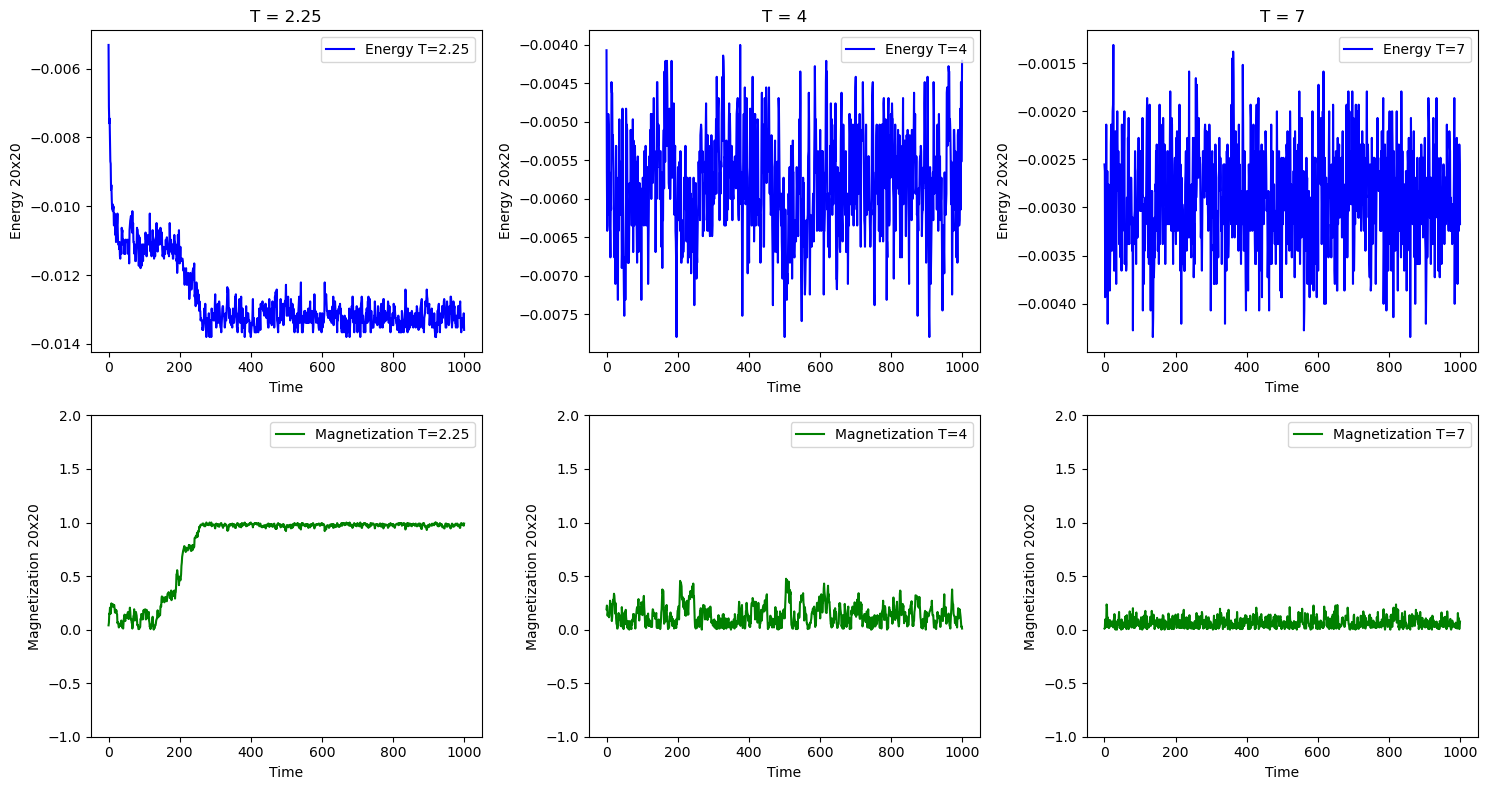

In [344]:
plt.figure(figsize=(15, 8))

for idx, T in enumerate(temperatures):
    plt.subplot(2, len(temperatures), idx + 1)
    plt.plot(results[T]["energies"], label=f"Energy T={T}" , c='b')
    plt.xlabel("Time")
    plt.ylabel(f"Energy {N}x{N}")
    plt.title(f"T = {T}")
    plt.legend()

    plt.subplot(2, len(temperatures), len(temperatures) + idx + 1)
    plt.plot(results[T]["magnetizations"], label=f"Magnetization T={T}", color="green")
    plt.ylim(-1,2)
    plt.xlabel("Time")
    plt.ylabel(f"Magnetization {N}x{N}")
    plt.legend()

plt.tight_layout()
plt.savefig(f"result for{N}x{N}(just J1).png",dpi=900)
plt.show()

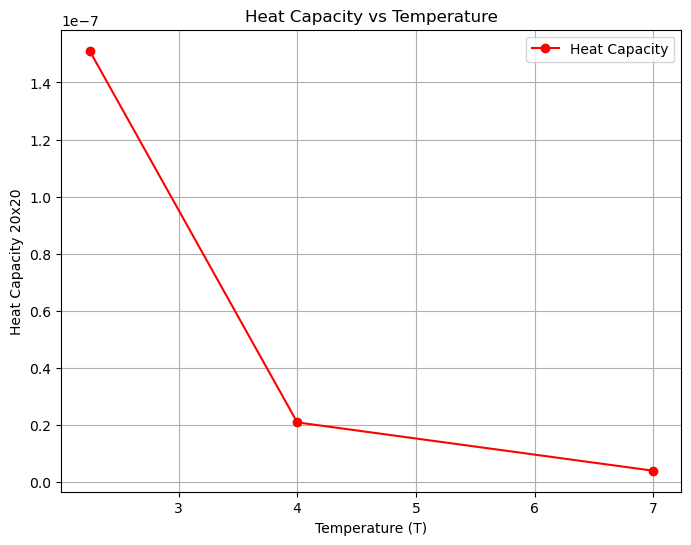

In [345]:
heat_capacities = [results[T]["heat_capacity"] for T in temperatures]
plt.figure(figsize=(8, 6))
plt.plot(temperatures, heat_capacities, marker='o', label="Heat Capacity",c='r')
plt.xlabel("Temperature (T)")
plt.ylabel(f"Heat Capacity {N}x{N}")
plt.title("Heat Capacity vs Temperature")
plt.legend()
plt.grid(True)
plt.savefig(f"Cv for{N}x{N}(just J1).png",dpi=900)
plt.show()